# Section contains regression based models

In [1]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)


# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns

# Scikit-Learn for Modeling
import sklearn

In [2]:
# Import Elastic Net, Ridge Regression, and Lasso Regression
from sklearn.linear_model import ElasticNet, Ridge, Lasso

# Import Random Forest and Gradient Boosted Trees
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [3]:
# Load cleaned dataset from Module 3
df = pd.read_csv('dataset.csv')
print(df.shape)

df.head()

(1018, 13)


,AcctType,ExecFlag,CreditCardFlag,AutoBillFlag,15_Shops,15_Spend,16_Shops,16_Spend,Duration,Age,GMiss,Gender_1.0,Gender_2.0
0,0,0,0,0,2.0,369.58,1.0,63.45,168.019877,63.588,1,0,0
1,0,0,0,0,9.0,2205.18,8.0,2240.88,60.025873,45.006,1,0,0
2,0,0,0,0,23.0,2334.16,5.0,403.52,23.984065,35.168,1,0,0
3,1,1,0,0,11.0,1808.86,2.0,341.02,99.977412,60.007,0,0,1
4,1,0,0,0,5.0,1145.72,4.0,376.13,188.028502,49.501,1,0,0


In [4]:
# Function for splitting training and test set
from sklearn.model_selection import train_test_split

In [5]:
# Create separate object for target variable
y=df.Duration
# Create separate object for input features
X=df.drop('Duration',axis=1)

In [6]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=1234)
y_test.describe()


count    204.000000
mean      98.050409
std       75.967089
min       11.992033
25%       36.008953
50%       82.498614
75%      130.729584
max      384.007885
Name: Duration, dtype: float64

In [7]:
print( len(X_train), len(X_test), len(y_train), len(y_test) )

(814, 204, 814, 204)


In [8]:
# Summary statistics of X_train
X_train.describe()

,AcctType,ExecFlag,CreditCardFlag,AutoBillFlag,15_Shops,15_Spend,16_Shops,16_Spend,Age,GMiss,Gender_1.0,Gender_2.0
count,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000
mean,0.108108,0.297297,0.006143,0.003686,14.985258,1849.367211,6.676904,780.901167,47.027006,0.610565,0.153563,0.235872
std,0.310708,0.457350,0.078181,0.060634,16.645934,3323.116957,9.159783,1068.338882,14.418273,0.487922,0.360751,0.424804
min,0.000000,0.000000,0.000000,0.000000,1.000000,12.980000,1.000000,-214.760000,23.839000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,4.000000,635.860000,1.000000,162.295000,35.692500,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,9.000000,1222.510000,3.000000,405.420000,44.253000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,19.000000,2259.367500,7.000000,939.047500,56.378250,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,139.000000,82892.860000,73.000000,11902.700000,96.673000,1.000000,1.000000,1.000000


In [9]:
# Standardize X_train
X_train_new=(X_train-X_train.mean())/X_train.std()

In [10]:
# Summary statistics of X_train_new
X_train_new.describe()

,AcctType,ExecFlag,CreditCardFlag,AutoBillFlag,15_Shops,15_Spend,16_Shops,16_Spend,Age,GMiss,Gender_1.0,Gender_2.0
count,8.140000e+02,8.140000e+02,8.140000e+02,8.140000e+02,8.140000e+02,8.140000e+02,8.140000e+02,8.140000e+02,8.140000e+02,8.140000e+02,8.140000e+02,8.140000e+02
mean,7.692454e-17,-2.182257e-18,8.729026e-18,-6.932074e-17,-7.569702e-17,7.002316e-16,2.864212e-18,6.301266e-16,-1.235566e-15,-2.569607e-16,2.607797e-16,-7.146890e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.479414e-01,-6.500440e-01,-7.856766e-02,-6.078316e-02,-8.401606e-01,-5.526099e-01,-6.197640e-01,-9.319713e-01,-1.608237e+00,-1.251358e+00,-4.256753e-01,-5.552499e-01
25%,-3.479414e-01,-6.500440e-01,-7.856766e-02,-6.078316e-02,-6.599364e-01,-3.651714e-01,-6.197640e-01,-5.790355e-01,-7.861209e-01,-1.251358e+00,-4.256753e-01,-5.552499e-01
50%,-3.479414e-01,-6.500440e-01,-7.856766e-02,-6.078316e-02,-3.595628e-01,-1.886353e-01,-4.014182e-01,-3.514626e-01,-1.923952e-01,7.981500e-01,-4.256753e-01,-5.552499e-01
75%,-3.479414e-01,1.536468e+00,-7.856766e-02,-6.078316e-02,2.411845e-01,1.233782e-01,3.527330e-02,1.480301e-01,6.485689e-01,7.981500e-01,-4.256753e-01,-5.552499e-01
max,2.870516e+00,1.536468e+00,1.271225e+01,1.643171e+01,7.450152e+00,2.438779e+01,7.240684e+00,1.041037e+01,3.443269e+00,7.981500e-01,2.346322e+00,1.798778e+00


In [11]:
# Function for creating model pipelines
from sklearn.pipeline import make_pipeline

In [12]:
# For standardization
from sklearn.preprocessing import StandardScaler

In [13]:
# Create pipelines dictionary
pipelines={'lasso':make_pipeline(StandardScaler(), Lasso(random_state=123)),
           'ridge':make_pipeline(StandardScaler(),Ridge(random_state=123)),
           'enet' :make_pipeline(StandardScaler(),ElasticNet(random_state=123)),
           # Add a pipeline for 'rf'
            'rf'  :make_pipeline(StandardScaler(),RandomForestRegressor(random_state=123)),
            # Add a pipeline for 'gb'
            'gb'  :make_pipeline(StandardScaler(),GradientBoostingRegressor(random_state=123))
    
}

In [14]:
# Lasso hyperparameters
lasso_hyperparameters={'lasso__alpha':[.001,.005,.01,.05,.1,.5,1,5,10]}
# Ridge hyperparameters
ridge_hyperparameters={'ridge__alpha':[.001,.005,.01,.05,.1,.5,1,5,10]}

In [15]:
# Elastic Net hyperparameters
enet_hyperparameters={
    'elasticnet__alpha':[.001,.005,.01,.05,.1,.5,1,5,10],
    'elasticnet__l1_ratio':[0.1,0.3,0.5,0.7,0.9]
}

In [16]:
# Random forest hyperparameters
rf_hyperparameters={
    'randomforestregressor__n_estimators':[100,200],
    'randomforestregressor__max_features':['auto','sqrt',0.33]
}

In [17]:
# Boosted tree hyperparameters
gb_hyperparameters={
    'gradientboostingregressor__n_estimators':[100,200],
    'gradientboostingregressor__learning_rate':[.05,.1,.2],
    'gradientboostingregressor__max_depth':[1,3,5]
}

In [18]:
pipelines.keys()

['enet', 'gb', 'ridge', 'rf', 'lasso']

In [19]:
# Create hyperparameters dictionary
hyperparameters={'enet':enet_hyperparameters,
                 'gb':gb_hyperparameters,'ridge':ridge_hyperparameters,
                 'rf':rf_hyperparameters,'lasso':lasso_hyperparameters}

In [20]:
for key in ['enet', 'gb', 'ridge', 'rf', 'lasso']:
    if key in hyperparameters:
        if type(hyperparameters[key]) is dict:
            print( key, 'was found in hyperparameters, and it is a grid.' )
        else:
            print( key, 'was found in hyperparameters, but it is not a grid.' )
    else:
        print( key, 'was not found in hyperparameters')

('enet', 'was found in hyperparameters, and it is a grid.')
('gb', 'was found in hyperparameters, and it is a grid.')
('ridge', 'was found in hyperparameters, and it is a grid.')
('rf', 'was found in hyperparameters, and it is a grid.')
('lasso', 'was found in hyperparameters, and it is a grid.')


In [21]:
# Helper for cross-validation
from sklearn.model_selection import GridSearchCV

In [22]:
# Create cross-validation object from Lasso pipeline and Lasso hyperparameters
model=GridSearchCV(pipelines['lasso'],hyperparameters['lasso'],cv=10,n_jobs=-1)

In [23]:
# Fit and tune model
model.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=123,
   selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'lasso__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [24]:
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    # Create cross-validation object from pipeline and hyperparameters
    model=GridSearchCV(pipeline,hyperparameters[name],cv=10,n_jobs=-1)
                 
    
    # Fit model on X_train, y_train
    x=model.fit(X_train,y_train)
    
    # Store model in fitted_models[name] 
    fitted_models[name]=model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

('enet', 'has been fitted.')
('gb', 'has been fitted.')
('ridge', 'has been fitted.')
('rf', 'has been fitted.')
('lasso', 'has been fitted.')


In [25]:
from sklearn.exceptions import NotFittedError

for name, model in fitted_models.items():
    try:
        pred = model.predict(X_test)
        print(name, 'has been fitted.')
    except NotFittedError as e:
        print(repr(e))

('enet', 'has been fitted.')
('lasso', 'has been fitted.')
('ridge', 'has been fitted.')
('gb', 'has been fitted.')
('rf', 'has been fitted.')


In [26]:
# Display best_score_ for each fitted model
for name, models in fitted_models.items():
    print(name,models.best_score_)

('enet', 0.2170006024049056)
('lasso', 0.22038388030154174)
('ridge', 0.1965179462503453)
('gb', 0.21620171252290071)
('rf', 0.20065348950703174)


In [27]:
# Import r2_score and mean_absolute_error functions
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [28]:
# Display fitted random forest object
fitted_models['rf']

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decr...timators=10, n_jobs=1,
           oob_score=False, random_state=123, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'randomforestregressor__n_estimators': [100, 200], 'randomforestregressor__max_features': ['auto', 'sqrt', 0.33]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [29]:
# Predict test set using fitted random forest
pred=fitted_models['rf'].predict(X_test)

In [30]:
# Calculate and print R^2 and MAE
print('R^2',r2_score(y_test,pred))
print('MAE',mean_absolute_error(y_test,pred))

('R^2', 0.17499260841153552)
('MAE', 53.046135746234675)


In [31]:
# Code here
for name,model in fitted_models.items():
    pred=model.predict(X_test)
    print(name)
    print('----------')
    print('R^2:',r2_score(y_test,pred))
    print('MAE:',mean_absolute_error(y_test,pred))

enet
----------
('R^2:', 0.22723446727015673)
('MAE:', 51.008414524302516)
lasso
----------
('R^2:', 0.21972414637796944)
('MAE:', 51.678878160168274)
ridge
----------
('R^2:', 0.22337748361222964)
('MAE:', 50.588064702357663)
gb
----------
('R^2:', 0.20530907906728124)
('MAE:', 51.058078710814968)
rf
----------
('R^2:', 0.17499260841153552)
('MAE:', 53.046135746234675)


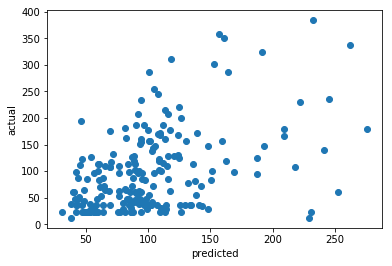

In [32]:
rf_pred = fitted_models['rf'].predict(X_test)
plt.scatter(rf_pred, y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()


In [33]:
result = pd.DataFrame()
result['predicted'] = pred
result['actual'] = y_test

In [34]:
type(fitted_models['rf'])

sklearn.model_selection._search.GridSearchCV

In [35]:
type(fitted_models['rf'].best_estimator_)

sklearn.pipeline.Pipeline

In [36]:
fitted_models['rf'].best_estimator_

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=123, verbose=0, warm_start=False))])

In [37]:
import pickle

In [38]:
with open('final_model.pkl', 'wb') as f:
    pickle.dump(fitted_models['rf'].best_estimator_, f)